In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import findspark
findspark.init()

In [38]:
import pyspark
from pyspark.sql import SparkSession
#import the maximum - max function
from pyspark.sql.functions import max
from pyspark.sql.functions import col

ImportError: cannot import name 'axis' from 'pyspark.sql.functions' (C:\BigData\spark-3.1.2-bin-hadoop3.2\python\pyspark\sql\functions.py)

In [4]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [5]:

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [6]:
path_repositories = "hdfs://localhost:9000/esgi/data/projets/planes/airlines3.csv"
sdf = spark.read.format('csv').options(delimiter=",", header=True).load(path_repositories)
df = sdf.select("*").toPandas()
#df.groupBy("Airport.Code").count().show()
df

,Airport.Code,Airport.Name,Airport.Name FULL,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,Atlanta,GA: Hartsfield-Jackson Atlanta International,2003/06,6,June,2003,1009,1275,3217,...,Delta Air Lines Inc.,Atlantic Southeast Airlines,AirTran Airways Corporation,America West Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,United Air Lines Inc.,US Airways Inc.,11,216
1,BOS,Boston,MA: Logan International,2003/06,6,June,2003,374,495,685,...,Atlantic Coast Airlines,Delta Air Lines Inc.,Atlantic Southeast Airlines,AirTran Airways Corporation,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.
2,BWI,Baltimore,MD: Baltimore/Washington International Thurgo...,2003/06,6,June,2003,296,477,389,...,AirTran Airways Corporation,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,United Air Lines Inc.,US Airways Inc.,Southwest Airlines Co.,11,29
3,CLT,Charlotte,NC: Charlotte Douglas International,2003/06,6,June,2003,300,472,735,...,Delta Air Lines Inc.,Atlantic Southeast Airlines,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.,US Airways Inc.,11,73
4,DCA,Washington,DC: Ronald Reagan Washington National,2003/06,6,June,2003,283,268,487,...,Atlantic Coast Airlines,Delta Air Lines Inc.,Atlantic Southeast Airlines,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.,US Airways Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,San Diego,CA: San Diego International,2016/01,1,January,2016,280,397,171,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,Spirit Air Lines,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,11,97
4404,SEA,Seattle,WA: Seattle/Tacoma International,2016/01,1,January,2016,357,513,351,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,10,104,1274
4405,SFO,San Francisco,CA: San Francisco International,2016/01,1,January,2016,560,947,2194,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,10,449,3825
4406,SLC,Salt Lake City,UT: Salt Lake City International,2016/01,1,January,2016,338,540,253,...,Delta Air Lines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Southwest Airlines Co.,8,84,1175,14,7426


In [7]:
# Liste des codes
codes = df[['Airport.Code']]
codes

,Airport.Code
0,ATL
1,BOS
2,BWI
3,CLT
4,DCA
...,...
4403,SAN
4404,SEA
4405,SFO
4406,SLC


In [8]:
# Colonne pour compter le nombre de répétion sur month
codes = df[['Time.Month']]
codes = codes.groupby(by='Time.Month').size().reset_index(name='count')
codes

,Time.Month,count
0,1,377
1,10,377
2,11,377
3,12,377
4,2,348
5,3,348
6,4,348
7,5,348
8,6,377
9,7,377


In [9]:
#Nous affichons ici le nombre de retards pour chaque aéroport
codes = df[['Airport.Name','Statistics.# of Delays.Late Aircraft']]
codes

,Airport.Name,Statistics.# of Delays.Late Aircraft
0,Atlanta,1275
1,Boston,495
2,Baltimore,477
3,Charlotte,472
4,Washington,268
...,...,...
4403,San Diego,397
4404,Seattle,513
4405,San Francisco,947
4406,Salt Lake City,540


In [10]:
# Les aéroports avec le plus de retard
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes

,,Statistics.# of Delays.Late Aircraft
Airport.Code,Airport.Name,
ORD,Chicago,315421
ATL,Atlanta,307206
DFW,Dallas/Fort Worth,260858
LAX,Los Angeles,189863
DEN,Denver,189656
LAS,Las Vegas,156536
IAH,Houston,142910
PHX,Phoenix,139684
SFO,San Francisco,133355


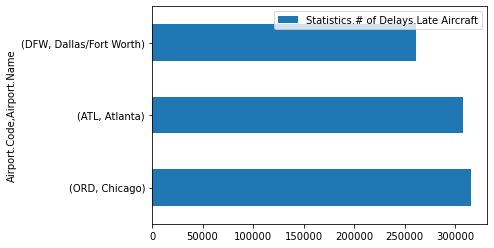

In [11]:
# Les 3 aéroports avec le plus de retard
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes.head(3).plot.barh();

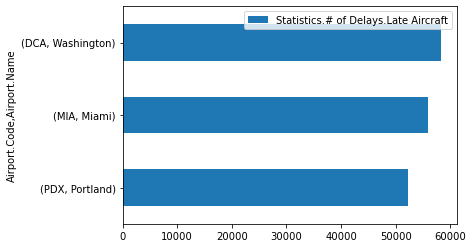

In [12]:
# Les 3 aéroports avec le moins de retard
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None).head(3)
codes.plot.barh();

In [13]:
# L'aéroport avec le plus de retard
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes.head(1)

,,Statistics.# of Delays.Late Aircraft
Airport.Code,Airport.Name,
ORD,Chicago,315421


In [14]:
# On affiche pour chaque aéroport les 
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Carrier','Statistics.# of Delays.Late Aircraft','Statistics.# of Delays.National Aviation System','Statistics.# of Delays.Security','Statistics.# of Delays.Weather']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes

,,Statistics.# of Delays.Late Aircraft
Airport.Code,Airport.Name,
ORD,Chicago,315421
ATL,Atlanta,307206
DFW,Dallas/Fort Worth,260858
LAX,Los Angeles,189863
DEN,Denver,189656
LAS,Las Vegas,156536
IAH,Houston,142910
PHX,Phoenix,139684
SFO,San Francisco,133355


In [15]:
#affichage du nombre de retard pour ATL en 2004 
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Month']]
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']=='2004'))]
#codes.plot.barh();

,Airport.Code,Airport.Name,Statistics.# of Delays.Late Aircraft,Time.Month
203,ATL,Atlanta,1265,1
232,ATL,Atlanta,1579,2
261,ATL,Atlanta,912,3
290,ATL,Atlanta,924,4
319,ATL,Atlanta,1515,5
348,ATL,Atlanta,2070,6
377,ATL,Atlanta,1811,7
406,ATL,Atlanta,1443,8
435,ATL,Atlanta,944,9
464,ATL,Atlanta,1445,10


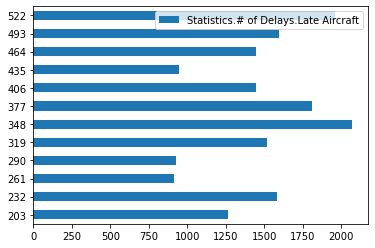

In [16]:
#affichage du nombre de retard pour ATL en 2004 
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Month']]
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']=='2004'))].plot.barh();
#codes.plot.barh();

In [19]:
#Séléction de l'aéroport qu'on souhaite voir
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Year']]
airport = input(print("Quel aéroport voulez-vous voir?"))
airport = airport.capitalize()
codes.loc[((df['Airport.Name']==airport))]

Quel aéroport voulez-vous voir?
NoneAtlanta


,Airport.Code,Airport.Name,Statistics.# of Delays.Late Aircraft,Time.Year
0,ATL,Atlanta,1275,2003
29,ATL,Atlanta,1791,2003
58,ATL,Atlanta,1766,2003
87,ATL,Atlanta,807,2003
116,ATL,Atlanta,906,2003
...,...,...,...,...
4263,ATL,Atlanta,1027,2015
4292,ATL,Atlanta,1034,2015
4321,ATL,Atlanta,1420,2015
4350,ATL,Atlanta,2176,2015


In [20]:
#affichage du nombre de retard pour chaque raison
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Statistics.# of Delays.National Aviation System','Statistics.# of Delays.Security','Statistics.# of Delays.Weather','Time.Month']]
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']=='2004'))]

,Airport.Code,Airport.Name,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Time.Month
203,ATL,Atlanta,1265,4567,15,599,1
232,ATL,Atlanta,1579,7959,13,787,2
261,ATL,Atlanta,912,3195,7,227,3
290,ATL,Atlanta,924,3550,14,209,4
319,ATL,Atlanta,1515,5402,2,556,5
348,ATL,Atlanta,2070,7274,11,695,6
377,ATL,Atlanta,1811,5038,9,491,7
406,ATL,Atlanta,1443,4442,12,411,8
435,ATL,Atlanta,944,5019,15,362,9
464,ATL,Atlanta,1445,5822,11,500,10


In [22]:
#Classement de des aéroports 
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Weather']]
codes = codes.astype({"Statistics.# of Delays.Weather":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Weather'],\
ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes

,,Statistics.# of Delays.Weather
Airport.Code,Airport.Name,
PDX,Portland,2791
SAN,San Diego,5056
FLL,Fort Lauderdale,5084
TPA,Tampa,5092
IAD,Washington,5849
SEA,Seattle,5953
MIA,Miami,7487
CLT,Charlotte,7738
MCO,Orlando,8124


In [66]:
#Affichage des mois ou le nombre de retards a été inferieur ou égal à 1000
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Month Name']]
select = input(print("Merci de séléctionner l'année :"))
select = select.capitalize()
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']==select) & (codes['Statistics.# of Delays.Late Aircraft'] <= 1000))]

Merci de séléctionner l'année :
None2007


,Airport.Code,Airport.Name,Statistics.# of Delays.Late Aircraft,Time.Month Name


In [67]:
#Affichage des mois ou le nombre de retards a été supérieur à 1000
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Month Name']]
select = input(print("Merci de séléctionner l'année :"))
select = select.capitalize()
codes = codes.astype({"Statistics.# of Delays.Late Aircraft":'int64'})
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']==select) & (codes['Statistics.# of Delays.Late Aircraft'] > 1000))]

Merci de séléctionner l'année :
None2007


,Airport.Code,Airport.Name,Statistics.# of Delays.Late Aircraft,Time.Month Name
1247,ATL,Atlanta,1797,January
1276,ATL,Atlanta,2109,Febuary
1305,ATL,Atlanta,1851,March
1334,ATL,Atlanta,1826,April
1363,ATL,Atlanta,1415,May
1392,ATL,Atlanta,3094,June
1421,ATL,Atlanta,3709,July
1450,ATL,Atlanta,3239,August
1479,ATL,Atlanta,1616,September
1508,ATL,Atlanta,2170,October


In [44]:
#Classement de des aéroports les plus fiables en fonction de tous les retards 
codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Statistics.# of Delays.National Aviation System','Statistics.# of Delays.Security','Statistics.# of Delays.Weather']]
codes.loc[((df['Airport.Code']=='ATL') & (df['Time.Year']=='2004'))]
codes = codes.astype({"Statistics.# of Delays.Weather":'int64'},{"Statistics.# of Delays.Late Aircraft":'int64'})
df1=codes.join("sum", col("Statistics.# of Delays.Weather")+col("Statistics.# of Delays.Late Aircraft"))
df1.show()
#codes

ValueError: Joining multiple DataFrames only supported for joining on index

In [53]:
#Séléction de l'aéroport le plus fiable entre deux aéroports
select = input(print("Sur quelle information voulez-vous savoir la fiabilité d'un aéroport?(Aircraft, Weather, Aviation system)"))
select = select.capitalize()
if(select == "Aircraft"):
    codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Late Aircraft','Time.Year']]
elif(select == "Weather"):
    codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.Weather','Time.Year']]
elif(select == "Aviation system"):
    codes = df[['Airport.Code','Airport.Name','Statistics.# of Delays.National Aviation System','Time.Year']]
airport = input(print("Quel est le premier aéroport que vous voulez comparer ?"))
airport = airport.capitalize()
airport2 = input(print("Quel aéroport voulez-vous voir?"))
airport2 = airport2.capitalize()
codes.loc[((df['Airport.Name']=="Atlanta") & (df['Airport.Name']=="New York") )]

Sur quelle information voulez-vous savoir la fiabilité d'un aéroport?(Aircraft, Weather, Aviation system)
NoneAircraft
Quel est le premier aéroport que vous voulez comparer ?
Noner
Quel aéroport voulez-vous voir?
Noner


TypeError: unsupported operand type(s) for &: 'str' and 'str'